#Tugas 2 Associate Data Science

Nama: Muhammad Eky Ramadhan

NIM: A11.2021.13510

Kelas: Data Science 06

Link Youtube: https://youtu.be/6h7477PXplQ?si=Mva5luipvwGiwHbP

##1. Mengumpulkan Data

In [ ]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Dataset "Fetal_Health.csv"
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BK/DS-06/TGS-1/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Dataset Fetal Health merupakan kumpulan data yang digunakan untuk menganalisis kondisi kesehatan janin selama kehamilan dengan memanfaatkan berbagai parameter medis. Data ini biasanya diperoleh dari pemeriksaaan seperti CTG (Cardiotocography), yang mengevaluasi kesehatan janin berdasarkan pola denyut jantung dan aktivitas uterus.

Berdasarkan dataset "Fetal_Health.csv", terdapat 2126 jumlah data dan 22 kolom

##2. Menelaah Data

In [ ]:
# Menampilkan informasi umum seperti kolom dan tipe data dari file dataset untuk mengidentifikasi kekurangan data dan mendapatkan pemahaman awal tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Mengganti format nama kolom 'baseline value' menjadi baseline_value
df.rename(columns={'baseline value':'baseline_value'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Menampilkan deskripsi dari file dataset
df.describe()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


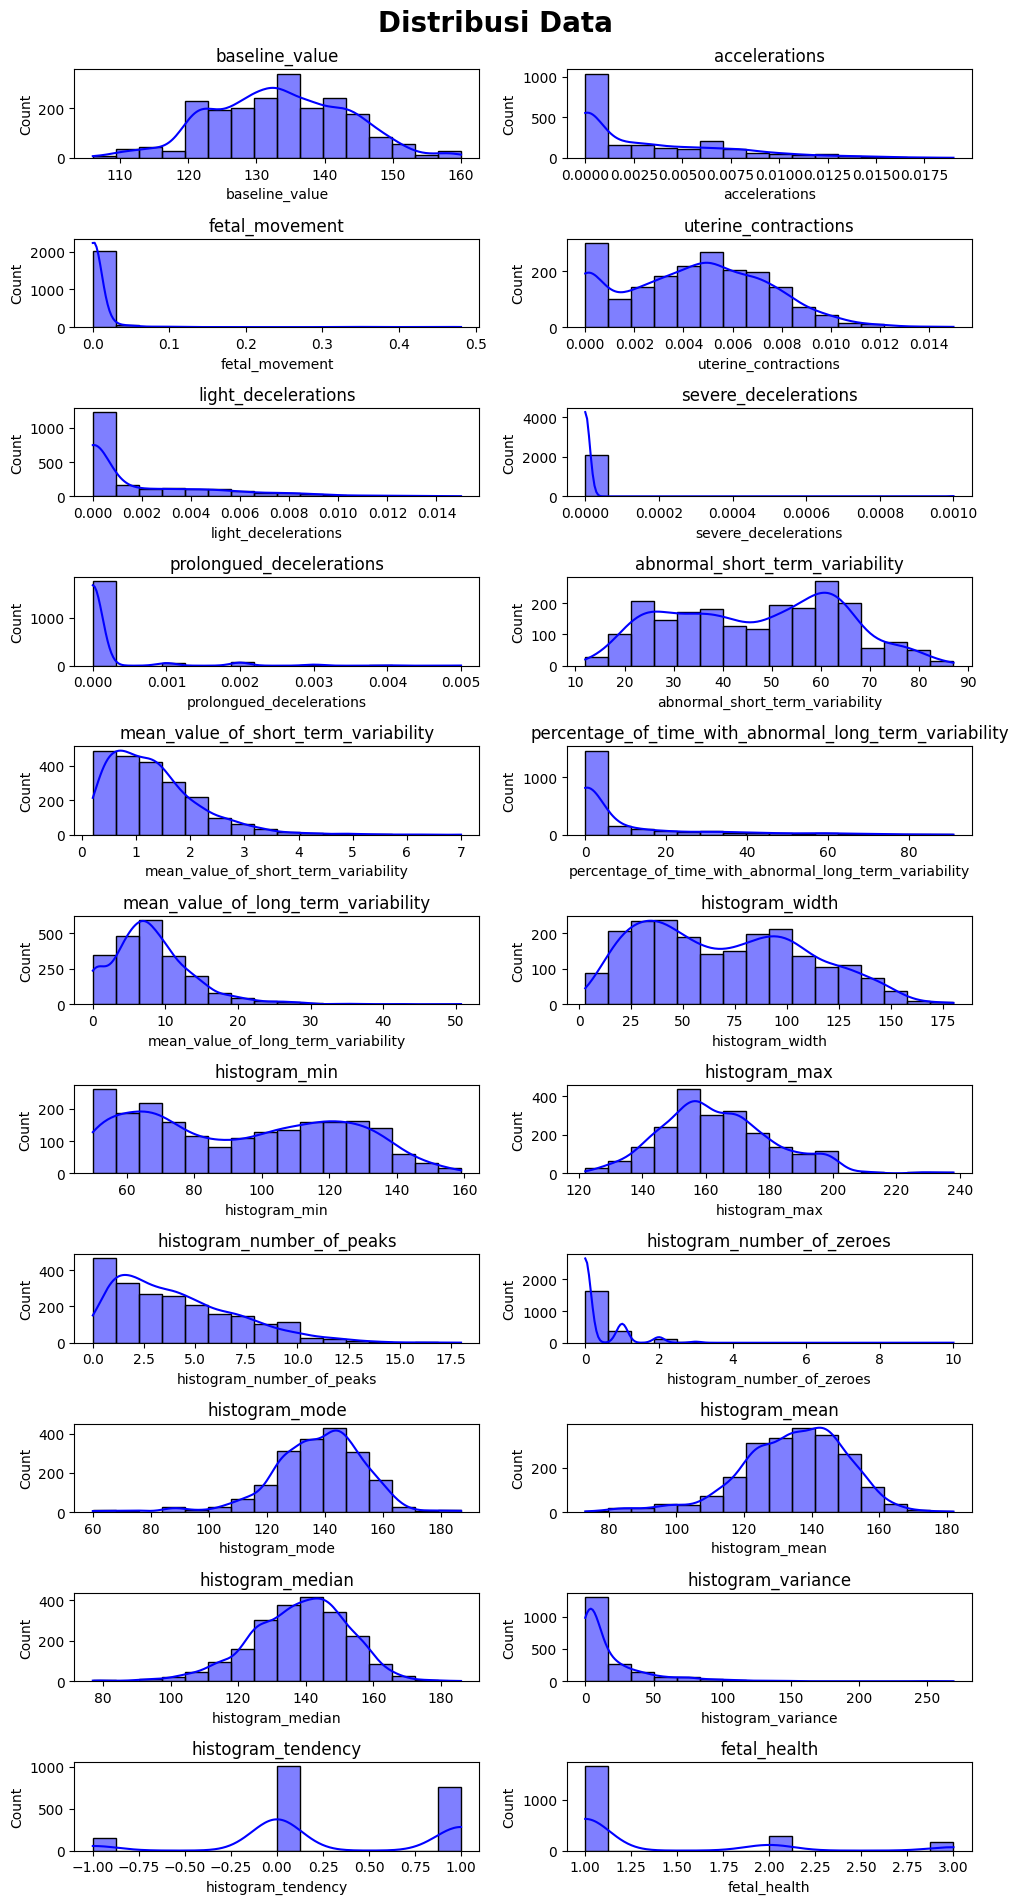

In [ ]:
# Melihat distribusi data pada setiap kolom dalam dataframe ke bentuk histogram atau kde

fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

fig.suptitle('Distribusi Data', fontweight='bold', fontsize=20, y=0.95)

for i, ax in enumerate(axes.flatten()):
  if i < len(df.columns):
    column_name = df.columns[i]
    sns.histplot(df[column_name].dropna(), bins=16, kde=True, ax=ax, color='blue', edgecolor='black')
    ax.set_title(f"{column_name}")
  else:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



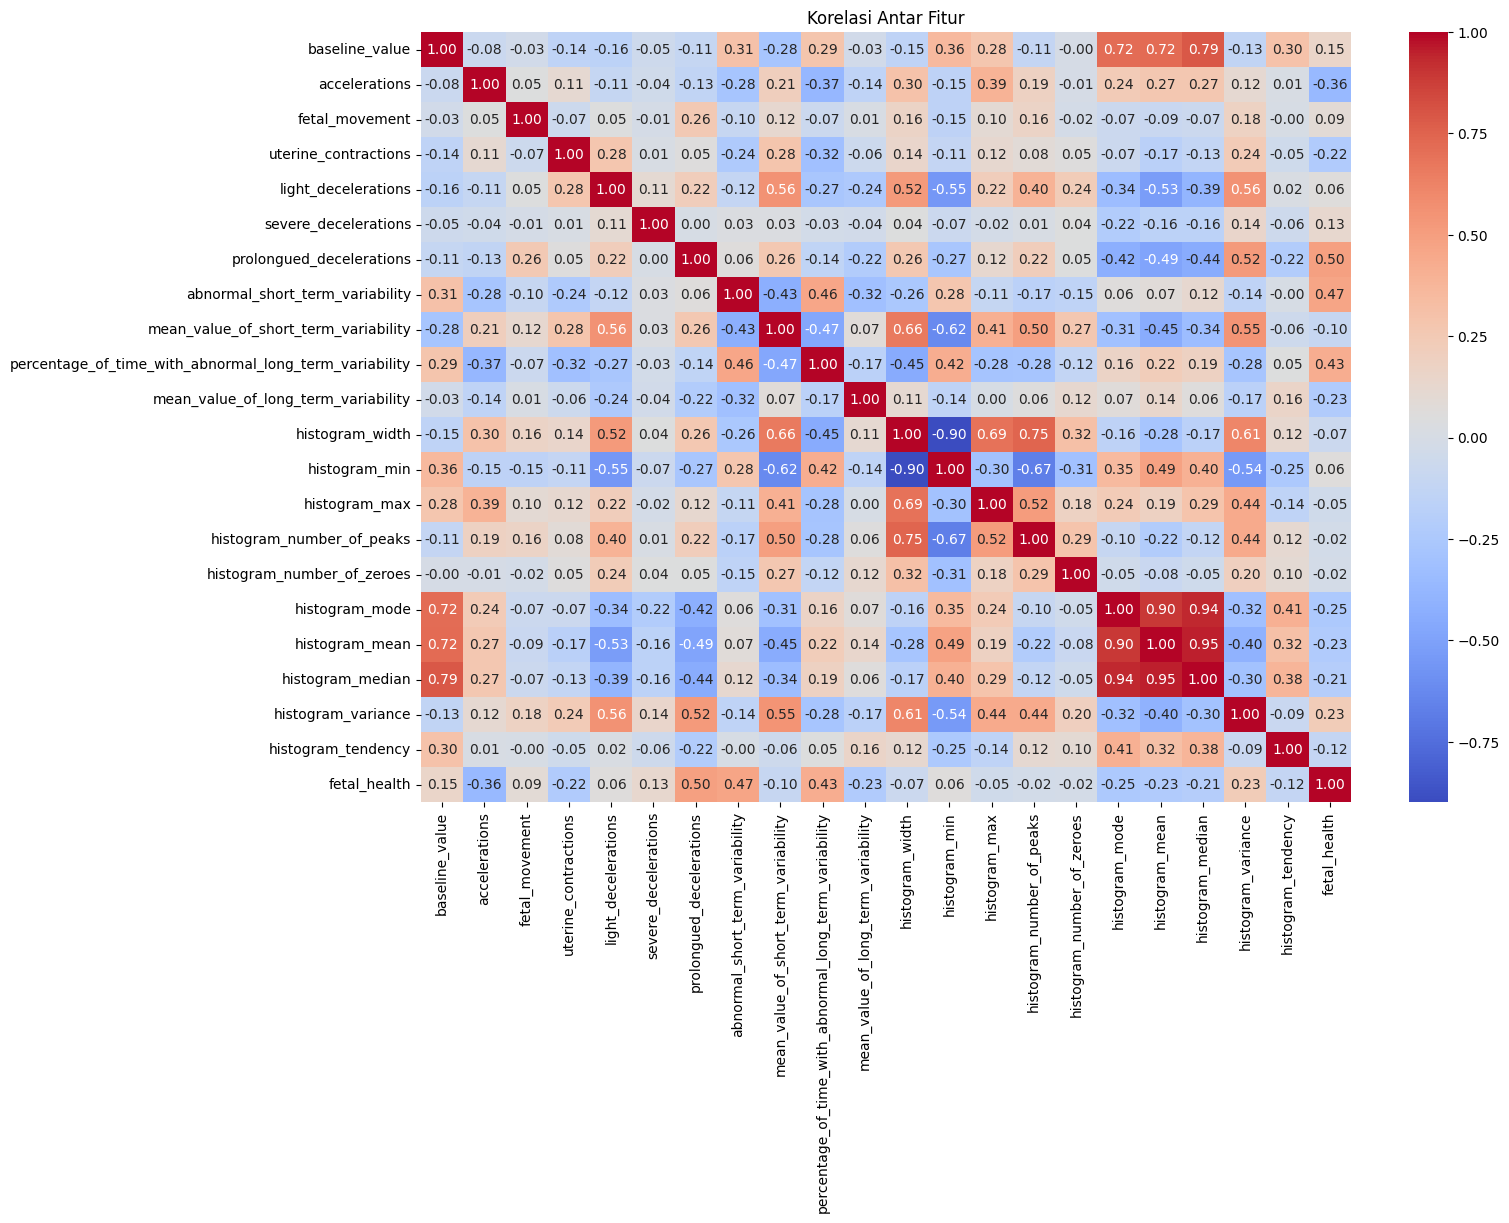

In [ ]:
# Menghitung korelasi antar fitur
correlation_maxtrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_maxtrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

##3. Validasi data

In [ ]:
# Mengecek jumlah missing values per kolom
missing_values = df.isnull().sum()
print("Data Missing values per kolom")
print(missing_values)

Data Missing values per kolom
baseline_value                                              0
accelerations                                               0
fetal_movement                                              0
uterine_contractions                                      212
light_decelerations                                         0
severe_decelerations                                        0
prolongued_decelerations                                  212
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                        0
percentage_of_time_with_abnormal_long_term_variability      0
mean_value_of_long_term_variability                         0
histogram_width                                             0
histogram_min                                               0
histogram_max                                               0
histogram_number_of_peaks                                   0
histogram_number_of_zeroes              

<Axes: >

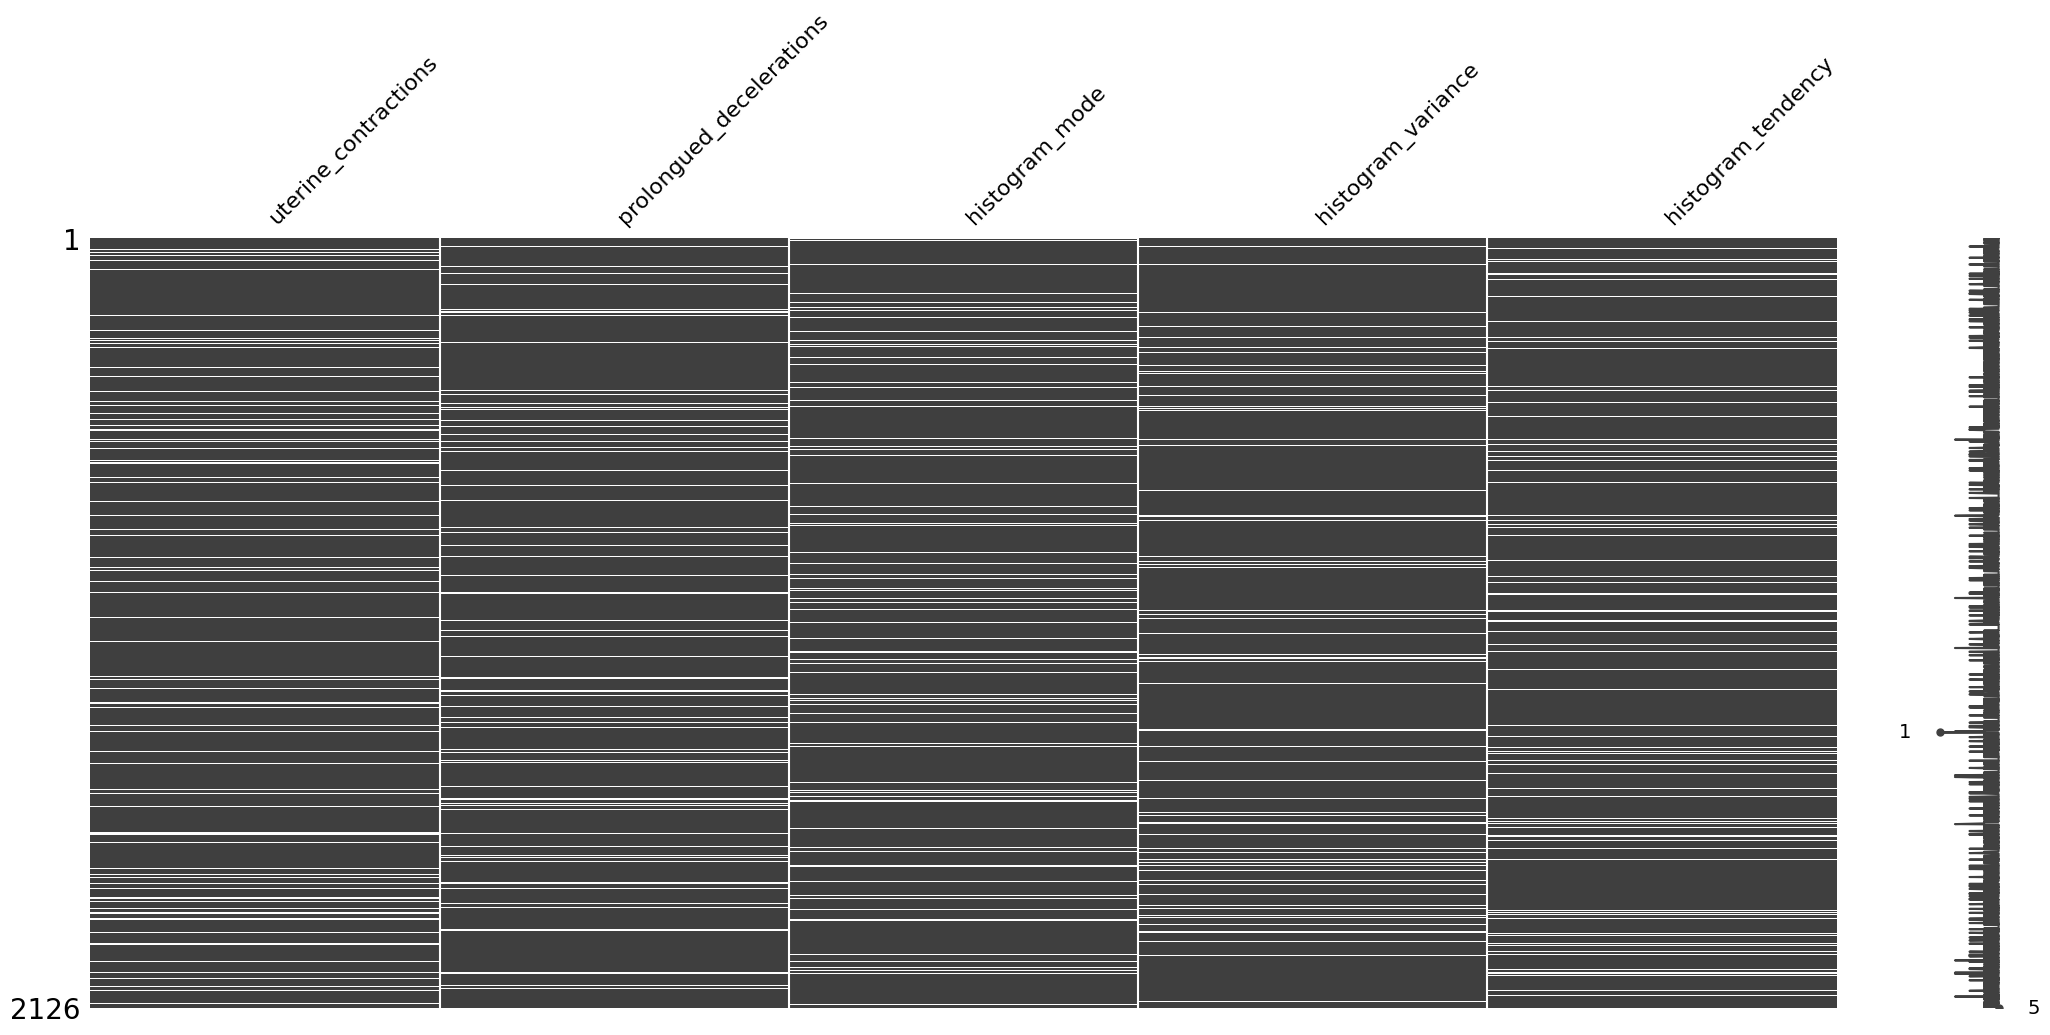

In [ ]:
# Visualisasi keberadaan nilai null
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
# Mengecek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 5


In [ ]:
# Menampilkan data duplikat
df_duplicates = df[df.duplicated(keep=False)]
df_duplicates

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.00,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.00,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
233,123.0,0.000,0.00,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.00,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.02,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.02,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
1112,122.0,0.000,0.00,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
1113,122.0,0.000,0.00,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
1457,148.0,0.005,0.00,0.002,0.0,0.0,0.0,40.0,0.9,0.0,...,136.0,171.0,1.0,0.0,153.0,155.0,156.0,4.0,0.0,1.0
1458,148.0,0.005,0.00,0.002,0.0,0.0,0.0,40.0,0.9,0.0,...,136.0,171.0,1.0,0.0,153.0,155.0,156.0,4.0,0.0,1.0


##4. Menentukan Object Data

In [ ]:
# Menggantikan nilai "?" atau nilai yang tidak diketahui/hilang menggunakan nan
df.replace("?", np.nan, inplace=True)
df

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
# Memisahkan kolom fitur dan target
target = "fetal_health"
features = df.drop(columns=[target]).columns.tolist()

print("Fitur:", features)
print("Target:", target)

Fitur: ['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
Target: fetal_health


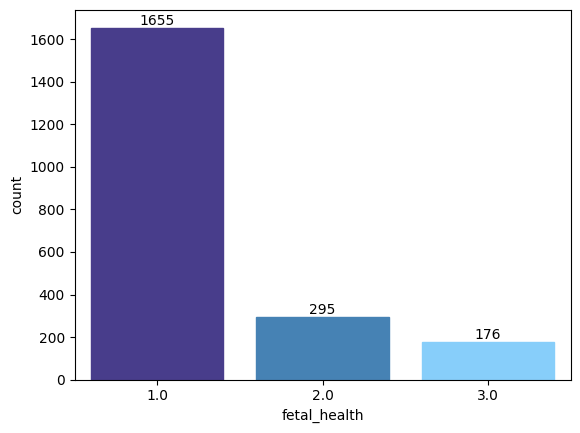

In [ ]:
# Visualisasi kolom fetal_health menggunakan bar plot untuk melihat distribusi data
colors = ["#483D8B", "#4682B4", "#87CEFA"]
ax = sns.countplot(data=df, x="fetal_health")
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
ax.bar_label(ax.containers[0])
plt.show()

##5. Membersihkan data

In [ ]:
# Menangani data duplikat dengan membuang baris duplikat yang bawah
df_cleaned = df.drop_duplicates(keep='last').copy()
df_cleaned.shape

(2121, 22)

In [ ]:
#Menampilkan julmah data duplikat setelah penghapusan
duplicates_after = df_cleaned.duplicated().sum()
print(f"Jumlah data duplikat setelah penghapusan: {duplicates_after}")

Jumlah data duplikat setelah penghapusan: 0


In [ ]:
# menangani data missing value dengan menggunakan nilai rata-rata masing-masing fitur

mean_uterine_contractions = df_cleaned['uterine_contractions'].mean()
df_cleaned['uterine_contractions'] = df_cleaned['uterine_contractions'].fillna(mean_uterine_contractions)

mean_prolongued_decelerations = df_cleaned['prolongued_decelerations'].mean()
df_cleaned['prolongued_decelerations'] = df_cleaned['prolongued_decelerations'].fillna(mean_prolongued_decelerations)

mean_histogram_mode = df_cleaned['histogram_mode'].mean()
df_cleaned['histogram_mode'] = df_cleaned['histogram_mode'].fillna(mean_histogram_mode)

mean_histogram_variance = df_cleaned['histogram_variance'].mean()
df_cleaned['histogram_variance'] = df_cleaned['histogram_variance'].fillna(mean_histogram_variance)

mean_histogram_tendency = df_cleaned['histogram_tendency'].mean()
df_cleaned['histogram_tendency'] = df_cleaned['histogram_tendency'].fillna(mean_histogram_tendency)

In [ ]:
#Mengecek jumlah missing values per kolom setelah menggunakan fillna
missing_values = df_cleaned.isnull().sum()
print("Mengecek Data Missing Values per Kolom:")
print(missing_values)

Mengecek Data Missing Values per Kolom:
baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0


In [ ]:
# Menampilkan data duplikat setelah menghapus missing value dan menampilkan jumlah data setelah pembersihan
duplicated = df_cleaned.duplicated().sum()
print(f"Jumlah data duplikat setelah menghapus missing value: {duplicated}")
print(f"Jumlah data bersih setelah pembersihan data: {df_cleaned.shape}")

Jumlah data duplikat setelah menghapus missing value: 0
Jumlah data bersih setelah pembersihan data: (2121, 22)


# Tugas 2 Associate Data Science

Nama: Muhammad Eky Ramadhan

Nim: A11.2021.13510

Kelas: Data Science 06

Link YT : https://youtu.be/6h7477PXplQ?si=Mva5luipvwGiwHbP

##6. Mengkrontruksi Data

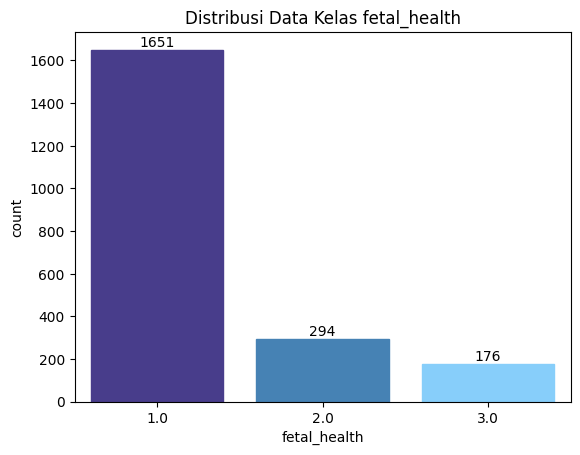

In [ ]:
# Membuat visualisasi Distribusi Data Kelas fetal_health
colors = ["#483D8B", "#4682B4", "#87CEFA"]
ax = sns.countplot(data=df_cleaned, x="fetal_health")
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
ax.bar_label(ax.containers[0])
plt.title("Distribusi Data Kelas fetal_health")
plt.show()

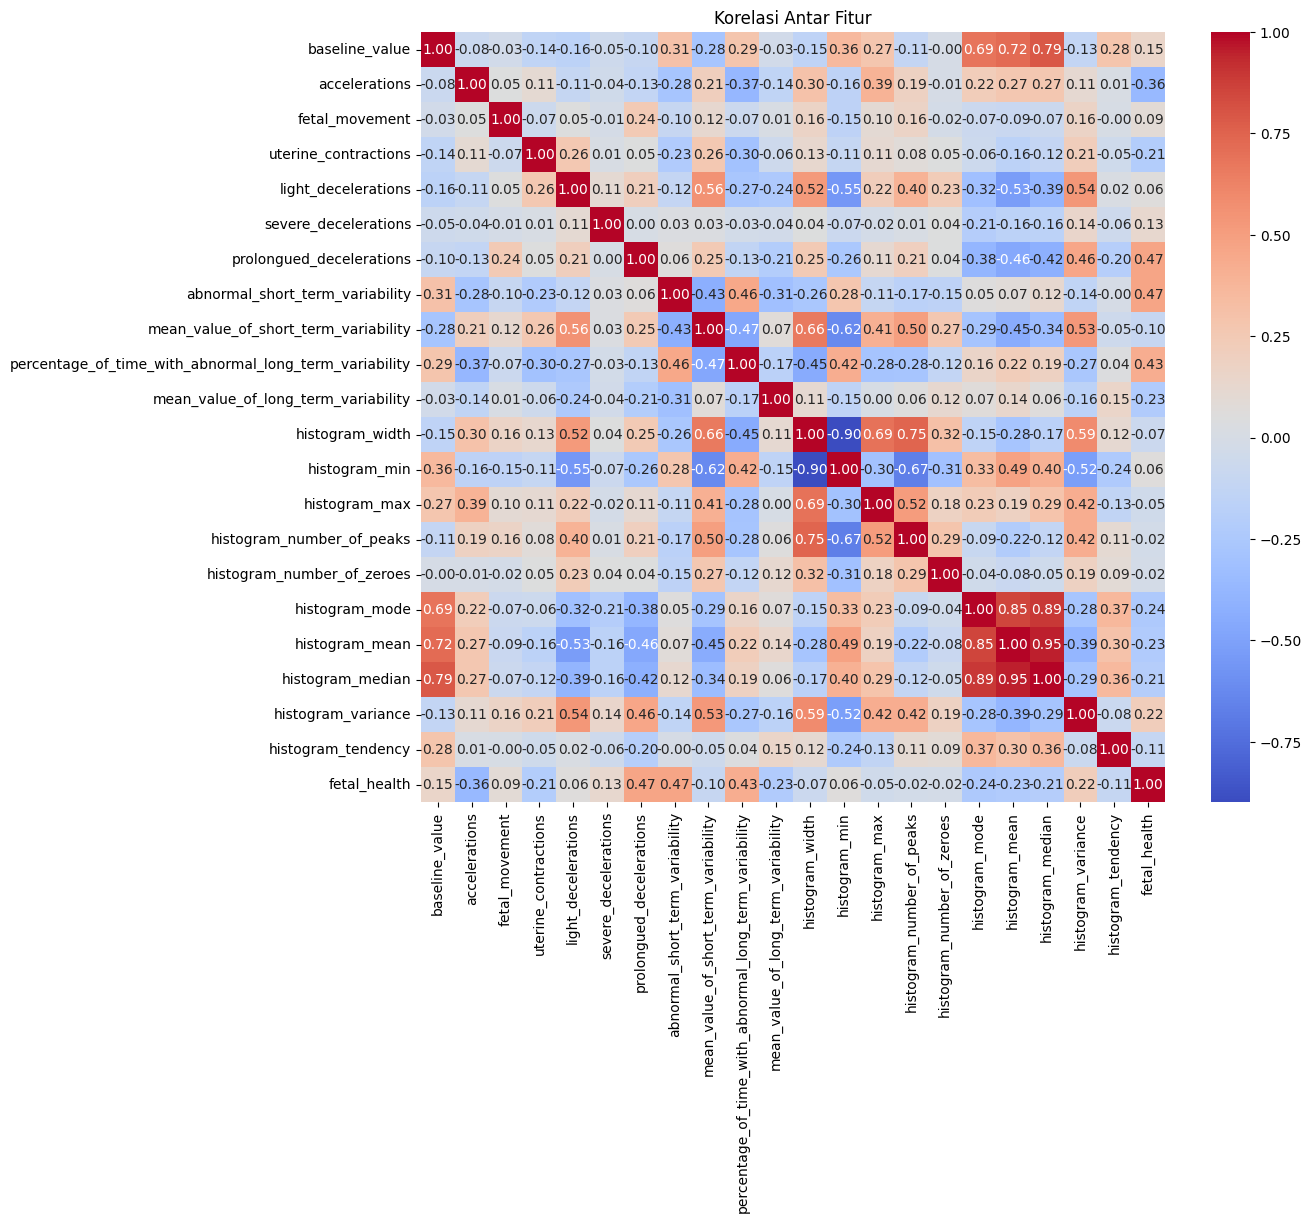

In [ ]:
# Menampilkan Korelasi Antar Fitur untuk mengidentifikasi fitur yang saling berkaitan
# untuk menentukan fitur mana yang dapat dihapus karena redundansi
# Nilai yang mendekati 1 atau -1 berarti fitur tersebut memiliki korelasi yang baik
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Menampilkan daftar kolom
df_cleaned.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

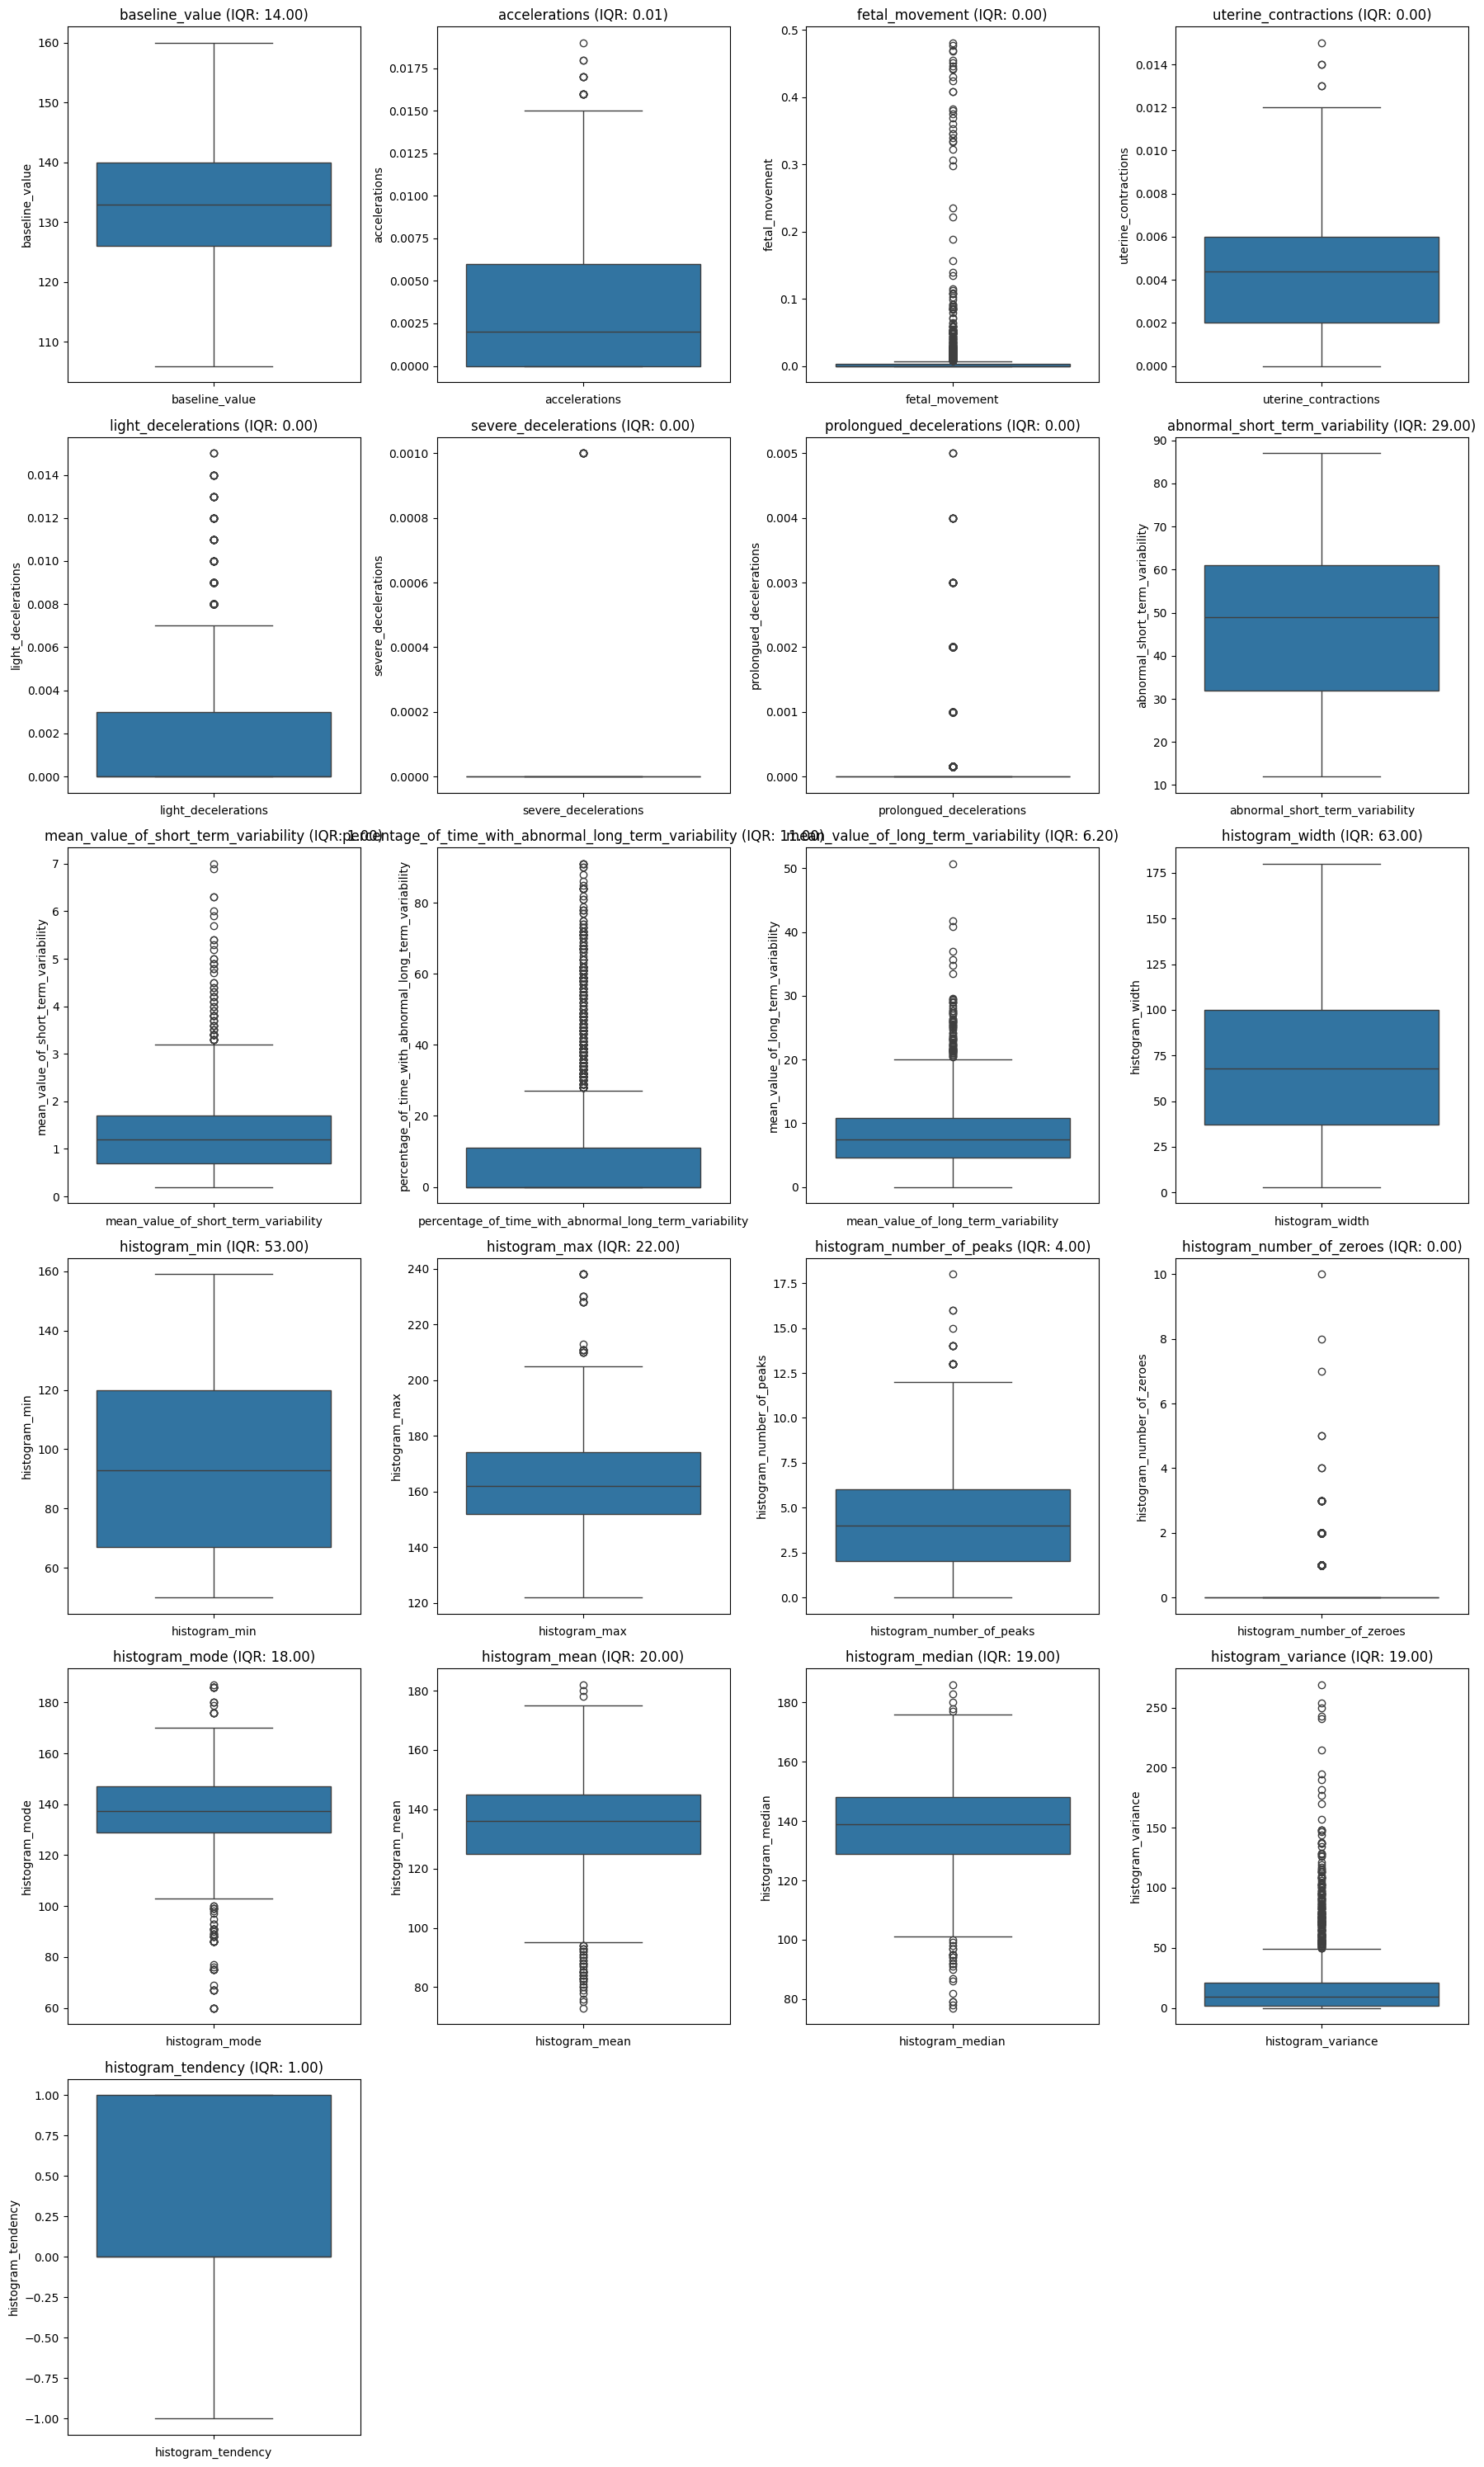

In [ ]:
# Mengidentifikasi adanya Outliers menggunakan visualisasi boxplot
def boxplot(dataframe, numeric_columns):

  num_plots = len(numeric_columns) # Menghitung jumlah plot dan tata letak subplot
  num_rows = (num_plots + 3) // 4
  fig, axes = plt.subplots(num_rows, 4, figsize=(18, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(numeric_columns): #perulangan untuk membuat boxplot per kolom

        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Membuat boxplot
        sns.boxplot(y=dataframe[column], ax=axes[i])
        axes[i].set_title(f"{column} (IQR: {IQR:.2f})")
        axes[i].set_xlabel(column)

  # Menghapus subplot yang tidak terpakai
  for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

  # Menampilkan hasil plot
  plt.tight_layout()
  plt.show()


#Menampilkan IQR boxplot
numeric_columns = np.array(df_cleaned.columns[:-1])

boxplot(df_cleaned, numeric_columns)

In [ ]:
# Menampilkan informasi kolom
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2121 non-null   float64
 1   accelerations                                           2121 non-null   float64
 2   fetal_movement                                          2121 non-null   float64
 3   uterine_contractions                                    2121 non-null   float64
 4   light_decelerations                                     2121 non-null   float64
 5   severe_decelerations                                    2121 non-null   float64
 6   prolongued_decelerations                                2121 non-null   float64
 7   abnormal_short_term_variability                         2121 non-null   float64
 8   mean_value_of_short_term_variability       

##7. Menentukan Label Data

In [ ]:
# Memisahkan fitur dan label(target)
X = df_cleaned.drop('fetal_health', axis=1)
y = df_cleaned['fetal_health']

In [ ]:
# Normalisasi pada fitur menggunakan RobustScaler dari library scklearn
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.92857143, -0.33333333,  0.        , ..., -0.94736842,
         3.36842105,  1.        ],
       [-0.07142857,  0.66666667,  0.        , ...,  0.05263158,
         0.15789474,  0.        ],
       [ 0.        ,  0.16666667,  0.        , ..., -0.05263158,
         0.21052632,  0.        ],
       ...,
       [ 0.5       , -0.16666667,  0.        , ...,  0.68421053,
        -0.26315789,  1.        ],
       [ 0.5       , -0.16666667,  0.        , ...,  0.63157895,
        -0.26315789,  1.        ],
       [ 0.64285714,  0.        ,  0.66666667, ...,  0.31578947,
        -0.42105263,  0.        ]])

In [ ]:
# Mengubah data dari hasil scaling menjadi dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.928571,-0.333333,0.000000,-1.095076,0.0,0.0,0.000000,0.827586,-0.7,3.909091,...,-0.063492,-0.584906,-1.636364,-0.50,0.0,-0.970462,0.05,-0.947368,3.368421,1.0
1,-0.071429,0.666667,0.000000,0.404924,1.0,0.0,0.000000,-1.103448,0.9,0.000000,...,0.984127,-0.471698,1.636364,0.50,1.0,0.000000,0.00,0.052632,0.157895,0.0
2,0.000000,0.166667,0.000000,0.904924,1.0,0.0,0.000000,-1.137931,0.9,0.000000,...,0.984127,-0.471698,1.636364,0.25,1.0,0.196205,-0.05,-0.052632,0.210526,0.0
3,0.071429,0.166667,0.000000,0.904924,1.0,0.0,0.000000,-1.137931,1.2,0.000000,...,0.777778,-0.754717,0.363636,1.75,0.0,-0.026017,-0.10,-0.105263,0.210526,1.0
4,-0.071429,0.833333,0.000000,0.904924,0.0,0.0,0.000000,-1.137931,1.2,0.000000,...,0.777778,-0.754717,0.363636,1.25,0.0,-0.026017,0.00,-0.052632,0.105263,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,0.500000,-0.333333,0.000000,0.654924,0.0,0.0,0.000000,1.034483,-1.0,2.272727,...,-0.444444,0.830189,0.681818,0.00,0.0,0.862872,0.70,0.684211,-0.368421,0.0
2117,0.500000,-0.166667,0.000000,0.654924,0.0,0.0,0.000000,1.000000,-0.8,2.000000,...,-0.031746,0.188679,0.318182,0.50,0.0,0.807316,0.60,0.631579,-0.315789,1.0
2118,0.500000,-0.166667,0.000000,0.654924,0.0,0.0,0.000000,1.034483,-0.8,1.818182,...,-0.015873,0.188679,0.363636,0.25,0.0,0.862872,0.60,0.684211,-0.263158,1.0
2119,0.500000,-0.166667,0.000000,0.404924,0.0,0.0,0.000000,1.000000,-0.8,2.454545,...,-0.031746,0.188679,0.318182,0.50,0.0,0.807316,0.55,0.631579,-0.263158,1.0


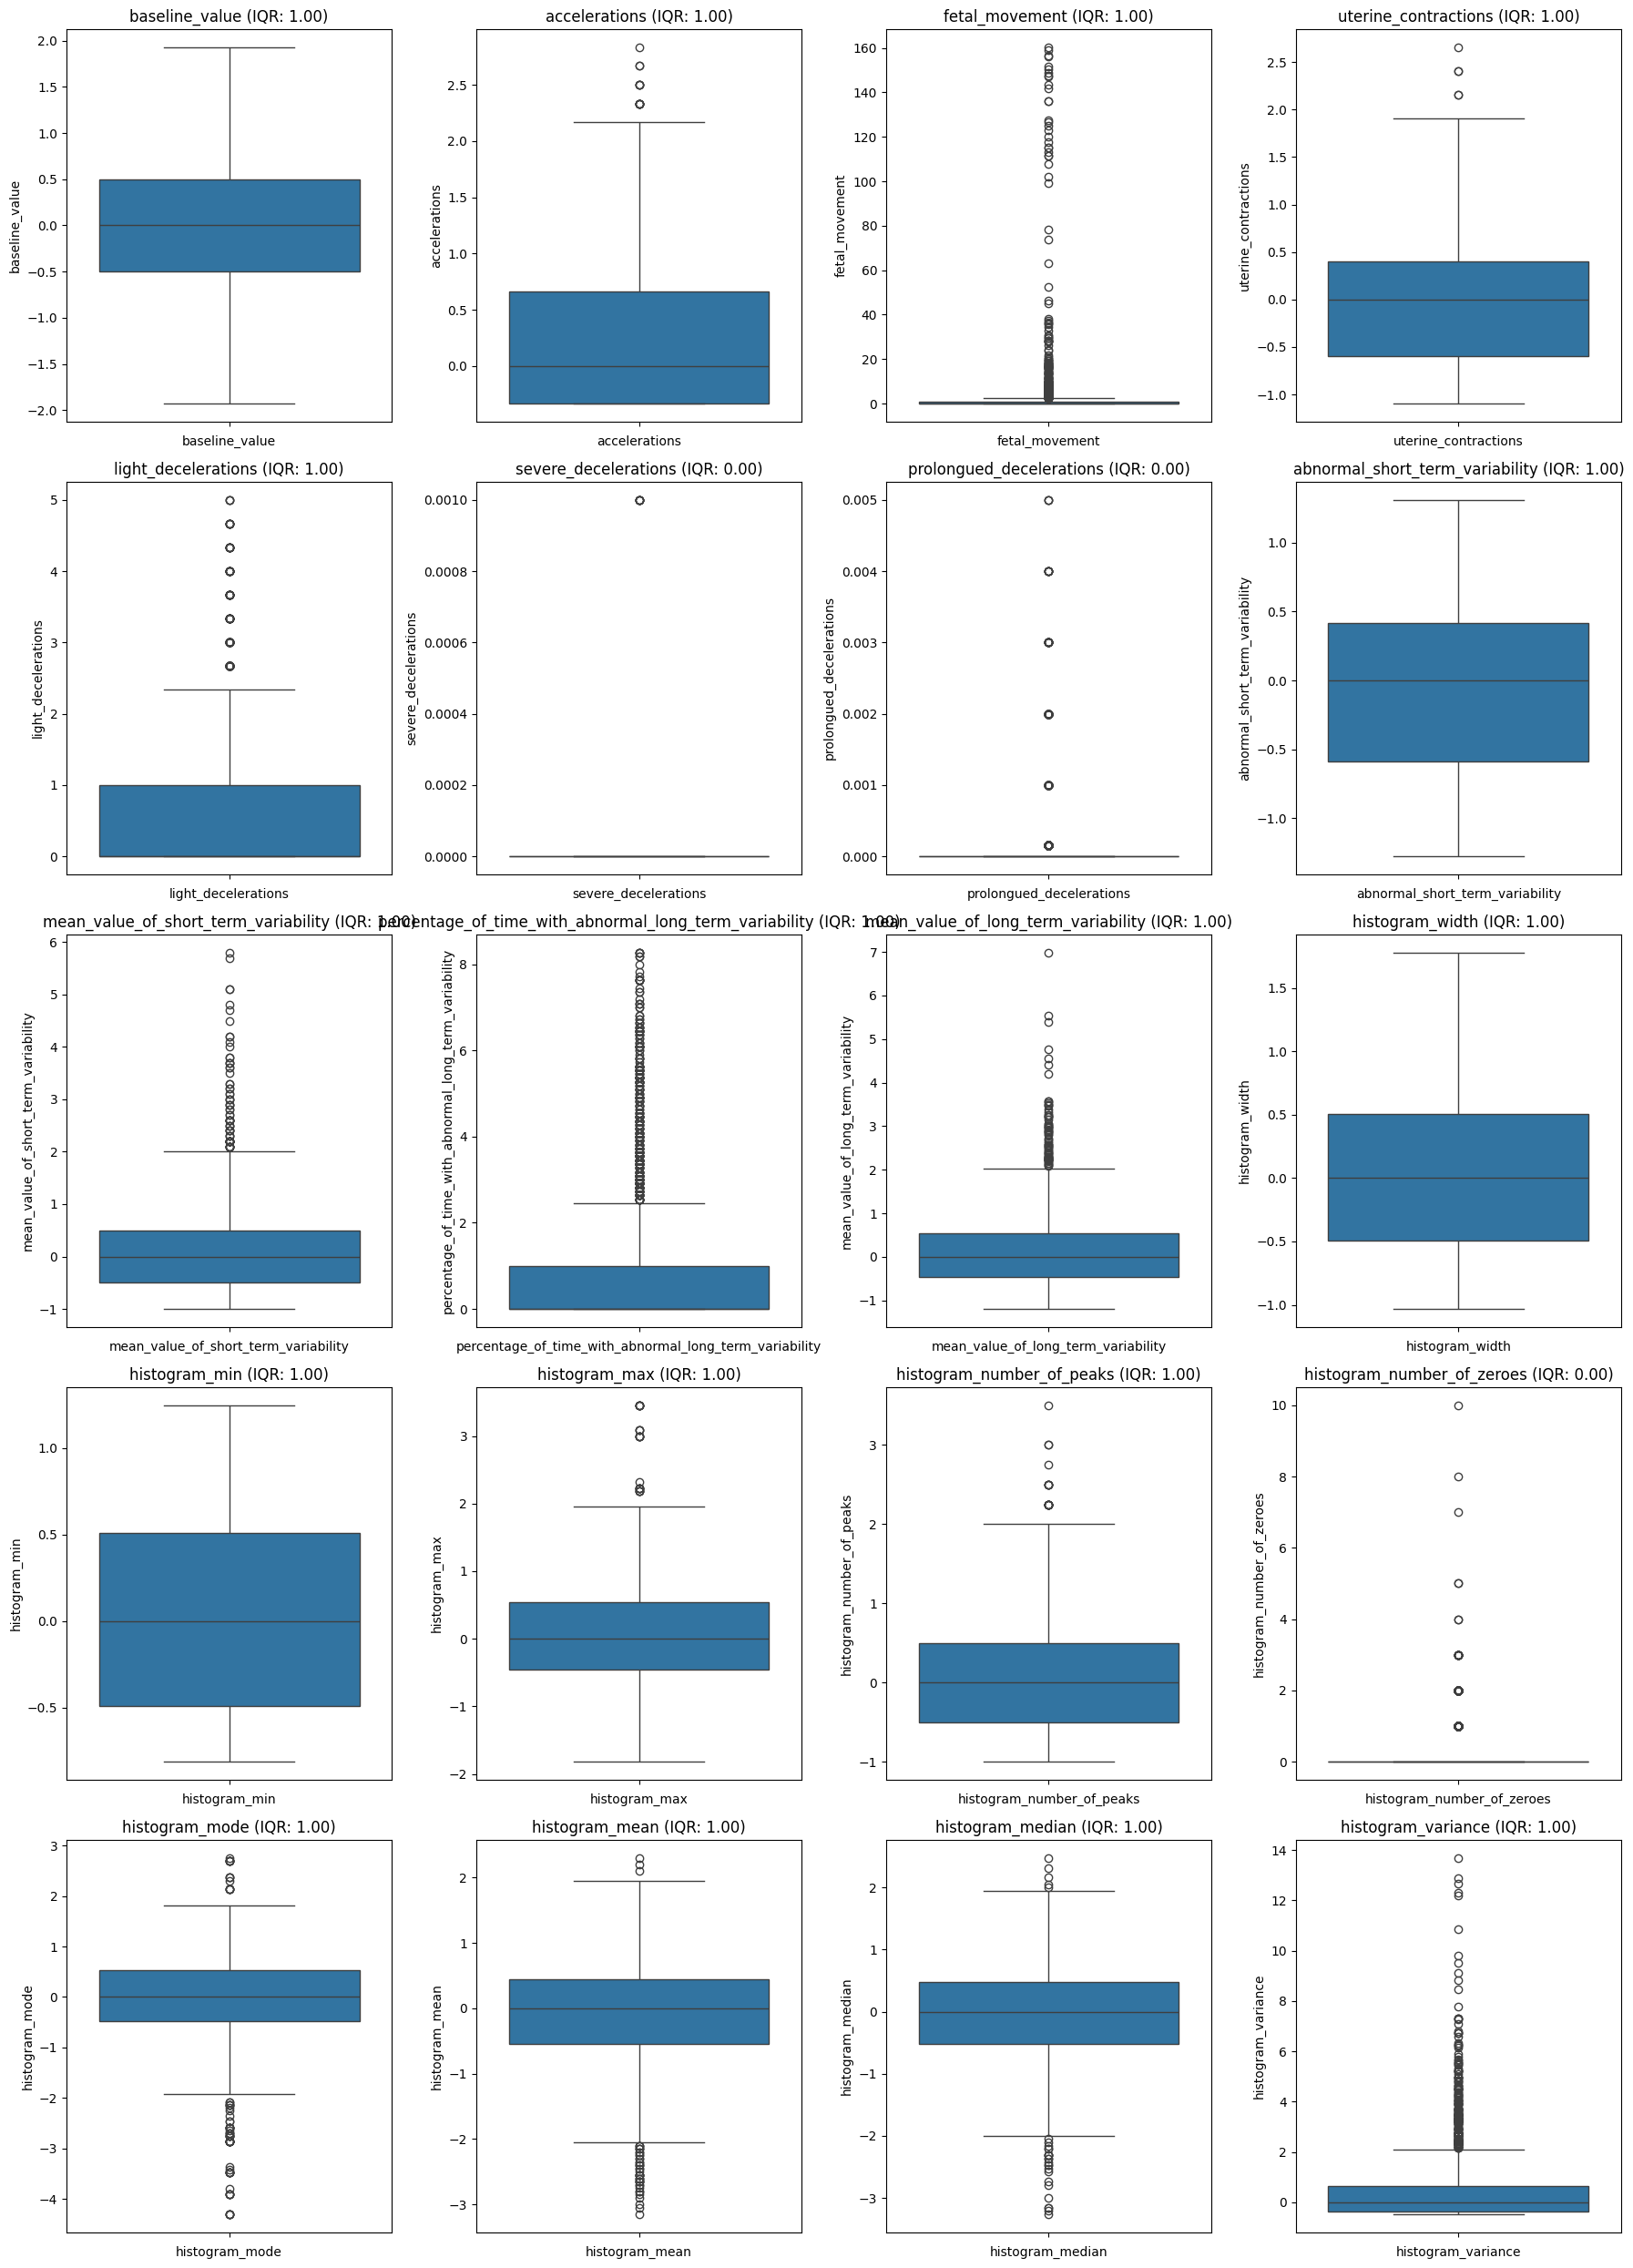

In [ ]:
# menampilkan boxplot dari X_scaled_df
numeric_columns = np.array(X_scaled_df.columns[:-1])
boxplot(X_scaled_df, numeric_columns)

In [ ]:
# Melakukan Oversapling dengan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

df_oversampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                            pd.Series(y_resampled, name='fetal_health')], axis=1)
df_oversampled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-0.928571,-0.333333,0.000000,-1.095076,0.000000,0.0,0.000000,0.827586,-0.700000,3.909091,...,-0.584906,-1.636364,-0.500000,0.000000,-0.970462,0.050000,-0.947368,3.368421,1.000000,2.0
1,-0.071429,0.666667,0.000000,0.404924,1.000000,0.0,0.000000,-1.103448,0.900000,0.000000,...,-0.471698,1.636364,0.500000,1.000000,0.000000,0.000000,0.052632,0.157895,0.000000,1.0
2,0.000000,0.166667,0.000000,0.904924,1.000000,0.0,0.000000,-1.137931,0.900000,0.000000,...,-0.471698,1.636364,0.250000,1.000000,0.196205,-0.050000,-0.052632,0.210526,0.000000,1.0
3,0.071429,0.166667,0.000000,0.904924,1.000000,0.0,0.000000,-1.137931,1.200000,0.000000,...,-0.754717,0.363636,1.750000,0.000000,-0.026017,-0.100000,-0.105263,0.210526,1.000000,1.0
4,-0.071429,0.833333,0.000000,0.904924,0.000000,0.0,0.000000,-1.137931,1.200000,0.000000,...,-0.754717,0.363636,1.250000,0.000000,-0.026017,0.000000,-0.052632,0.105263,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,-0.136372,-0.333333,117.030127,-0.254176,0.878800,0.0,0.002636,-0.827572,1.181799,0.000000,...,-0.646664,1.008292,1.431903,0.000000,-0.753260,-1.245481,-0.913874,4.765711,0.000000,3.0
4949,-0.335228,-0.316288,8.890160,-0.146211,1.299243,0.0,0.000355,-0.400667,1.343751,0.000000,...,-0.719447,0.538482,0.948865,1.948865,-3.430690,-2.214205,-3.087920,5.113638,0.252064,3.0
4950,-0.179658,-0.333333,0.828262,-0.151871,2.494929,0.0,0.002268,0.611807,0.809129,0.000000,...,-0.419113,-0.750692,0.814402,0.000000,-0.679220,-1.399291,-1.149141,0.420326,0.082316,3.0
4951,-0.714286,-0.333333,0.000000,-1.095076,0.000000,0.0,0.000000,0.756568,-0.900000,6.962121,...,0.320755,-1.500000,-0.735119,0.000000,-0.803795,-0.647024,-0.786341,-0.470551,1.000000,3.0


Distribusi Kelas fetal_health: fetal_health
2.0    1651
1.0    1651
3.0    1651
Name: count, dtype: int64


Text(0.5, 1.0, 'Jumlah Kelas fetal_health')

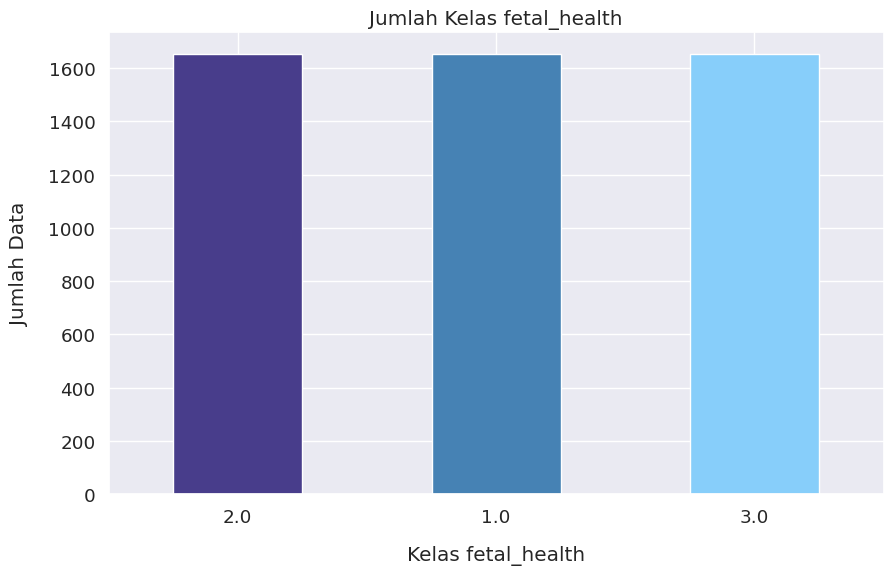

In [ ]:
# Memeriksa jumlah data pada tiap class setelah oversampling
print("Distribusi Kelas fetal_health:", df_oversampled['fetal_health'].value_counts())
sns.set(font_scale=1.2)
df_oversampled['fetal_health'].value_counts().plot(kind='bar', color=['#483D8B', '#4682B4', '#87CEFA'], figsize=(10, 6), rot=0)
plt.xlabel('Kelas fetal_health', labelpad=14)
plt.ylabel('Jumlah Data', labelpad=14)
plt.title("Jumlah Kelas fetal_health")

In [ ]:
# Import library train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##8. Membangun Model

In [ ]:
# Mengimport model klasifikasi dari sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, f1_score

In [ ]:
# Melatih model Decision Tre
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Mdlatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Melatih model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

##9. Mengevaluasi Hasil Pemodelan

-------------------- Decision Tree --------------------
              precision    recall  f1-score   support

         1.0       0.96      0.91      0.93       354
         2.0       0.89      0.96      0.92       300
         3.0       0.99      0.98      0.98       337

    accuracy                           0.95       991
   macro avg       0.94      0.95      0.95       991
weighted avg       0.95      0.95      0.95       991



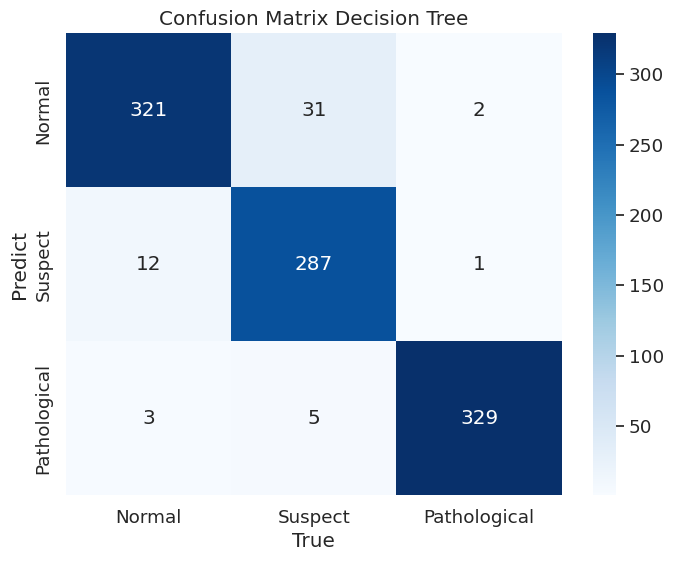

In [ ]:
# Mengevaluasi model Decision Tree menggunakan Confusion Matrix

# Prediksi model
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model
print("-" * 20, "Decision Tree", "-" * 20)
print(classification_report(y_test, y_pred_dt))
dt_acc = accuracy_score(y_test, y_pred_dt)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
fetal_labels = ['Normal', 'Suspect', 'Pathological']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('Confusion Matrix Decision Tree')
plt.show()

-------------------- Random Forest --------------------
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       354
         2.0       0.92      0.98      0.95       300
         3.0       0.99      0.99      0.99       337

    accuracy                           0.97       991
   macro avg       0.97      0.97      0.97       991
weighted avg       0.97      0.97      0.97       991



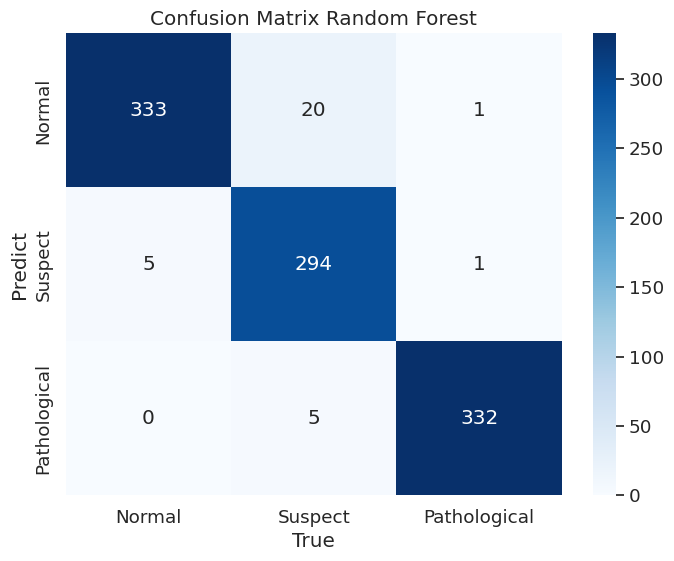

In [ ]:
# Mengevaluasi model Random Forest menggunakan Confusion Matrix

#Prediksi model
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print("-" * 20, "Random Forest", "-" * 20)
print(classification_report(y_test, y_pred_rf))
rf_acc = accuracy_score(y_test, y_pred_rf)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
fetal_labels = ['Normal', 'Suspect', 'Pathological']

#visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('Confusion Matrix Random Forest')
plt.show()

-------------------- KNN --------------------
              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       354
         2.0       0.86      0.96      0.91       300
         3.0       0.97      0.98      0.98       337

    accuracy                           0.93       991
   macro avg       0.93      0.94      0.93       991
weighted avg       0.94      0.93      0.93       991



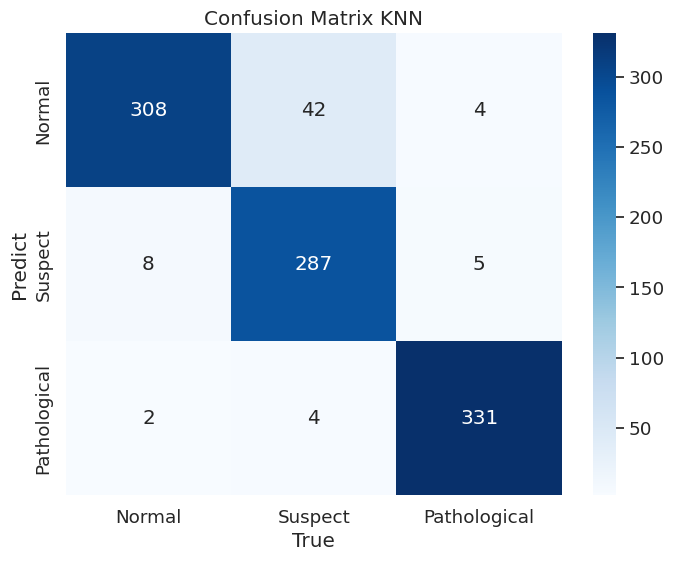

In [ ]:
# Mengevaluasi model KNN menggunakan Confusion Matrix

#Prediksi model
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model
print("-" * 20, "KNN", "-" * 20)
print(classification_report(y_test, y_pred_knn))
knn_acc = accuracy_score(y_test, y_pred_knn)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
fetal_labels = ['Normal', 'Suspect', 'Pathological']

# visusalisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('Confusion Matrix KNN')
plt.show()

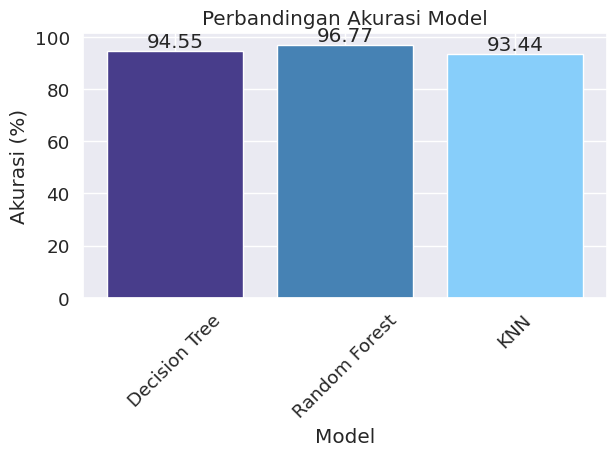

In [ ]:
# Membuat dataframe dan Menampilkan data akurasi pada model
model_comp = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [dt_acc * 100, rf_acc * 100, knn_acc * 100]
})

colors = ['#483D8B', '#4682B4', '#87CEFA']
fig, ax = plt.subplots()

bars = ax.bar(model_comp['Model'], model_comp['Accuracy'], color=colors)
ax.set(title='Perbandingan Akurasi Model', xlabel='Model', ylabel='Akurasi (%)')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#10. Optimasi Model Klasifikasi

In [ ]:
# menghapus kolom dari dataset agar lebih ringan dan berisi fitur-fitur yang relevan
col2drop = ['histogram_number_of_peaks', 'histogram_number_of_zeroes']

df_selected = df_oversampled.drop(col2drop, axis=1).copy()
df_selected

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-0.928571,-0.333333,0.000000,-1.095076,0.000000,0.0,0.000000,0.827586,-0.700000,3.909091,-0.806452,-0.063492,-0.584906,-1.636364,-0.970462,0.050000,-0.947368,3.368421,1.000000,2.0
1,-0.071429,0.666667,0.000000,0.404924,1.000000,0.0,0.000000,-1.103448,0.900000,0.000000,0.483871,0.984127,-0.471698,1.636364,0.000000,0.000000,0.052632,0.157895,0.000000,1.0
2,0.000000,0.166667,0.000000,0.904924,1.000000,0.0,0.000000,-1.137931,0.900000,0.000000,0.967742,0.984127,-0.471698,1.636364,0.196205,-0.050000,-0.052632,0.210526,0.000000,1.0
3,0.071429,0.166667,0.000000,0.904924,1.000000,0.0,0.000000,-1.137931,1.200000,0.000000,2.516129,0.777778,-0.754717,0.363636,-0.026017,-0.100000,-0.105263,0.210526,1.000000,1.0
4,-0.071429,0.833333,0.000000,0.904924,0.000000,0.0,0.000000,-1.137931,1.200000,0.000000,2.016129,0.777778,-0.754717,0.363636,-0.026017,0.000000,-0.052632,0.105263,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,-0.136372,-0.333333,117.030127,-0.254176,0.878800,0.0,0.002636,-0.827572,1.181799,0.000000,0.867952,0.911994,-0.646664,1.008292,-0.753260,-1.245481,-0.913874,4.765711,0.000000,3.0
4949,-0.335228,-0.316288,8.890160,-0.146211,1.299243,0.0,0.000355,-0.400667,1.343751,0.000000,-1.193548,0.809163,-0.719447,0.538482,-3.430690,-2.214205,-3.087920,5.113638,0.252064,3.0
4950,-0.179658,-0.333333,0.828262,-0.151871,2.494929,0.0,0.002268,0.611807,0.809129,0.000000,-1.193548,0.106314,-0.419113,-0.750692,-0.679220,-1.399291,-1.149141,0.420326,0.082316,3.0
4951,-0.714286,-0.333333,0.000000,-1.095076,0.000000,0.0,0.000000,0.756568,-0.900000,6.962121,-0.529378,-0.777778,0.320755,-1.500000,-0.803795,-0.647024,-0.786341,-0.470551,1.000000,3.0


In [ ]:
# memisahkan fitur dalam dataset
X_selected = df_selected.drop('fetal_health', axis=1).values
y = df_selected['fetal_health']

In [ ]:
# membagi dataset menjadi data training dan data testing
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters for Decision Tree: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy for Decision Tree: 0.9490155147233118

 -------------------- Evaluasi Decision Tree --------------------
              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       354
         2.0       0.90      0.95      0.92       300
         3.0       0.99      0.99      0.99       337

    accuracy                           0.95       991
   macro avg       0.95      0.95      0.95       991
weighted avg       0.95      0.95      0.95       991

Akurasi Model Decision Tree (Setelah Seleksi Fitur): 94.85%


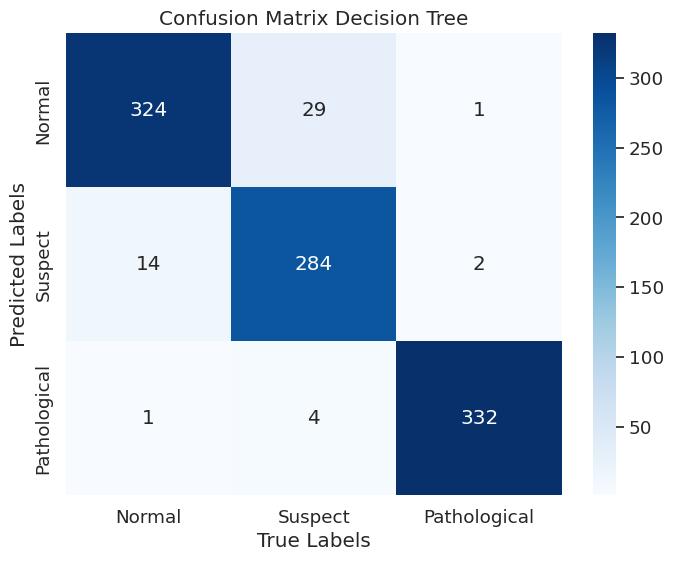

In [ ]:
# mencari parameter terbaik untuk model decision tree menggunakan GridSearchCV
# melatih model dengan parameter terbaik yang ditemukan
# mengevaluasi menggunakan data testing
from sklearn.model_selection import GridSearchCV

# Decision tree

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_dt.fit(X_train_selected, y_train_selected)

print("\nBest Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)

dt_best_model = grid_search_dt.best_estimator_

dt_best_model.fit(X_train_selected, y_train_selected)

y_pred_dt = dt_best_model.predict(X_test_selected)

print("\n", "-" * 20, "Evaluasi Decision Tree", "-" * 20)
print(classification_report(y_test_selected, y_pred_dt))

dt_acc_selected = accuracy_score(y_test_selected, y_pred_dt)
print(f"Akurasi Model Decision Tree (Setelah Seleksi Fitur): {dt_acc_selected:.2%}")

cm = confusion_matrix(y_test_selected, y_pred_dt)
fetal_labels = ['Normal', 'Suspect', 'Pathological']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()


Proses Grid Search dimulai...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters for Random Forest: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.9724885111524021

 -------------------- Evaluasi Random Forest --------------------
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       354
         2.0       0.92      0.98      0.95       300
         3.0       0.99      0.99      0.99       337

    accuracy                           0.97       991
   macro avg       0.97      0.97      0.97       991
weighted avg       0.97      0.97      0.97       991

Akurasi Model Random Forest (Setelah Seleksi Fitur): 96.97%


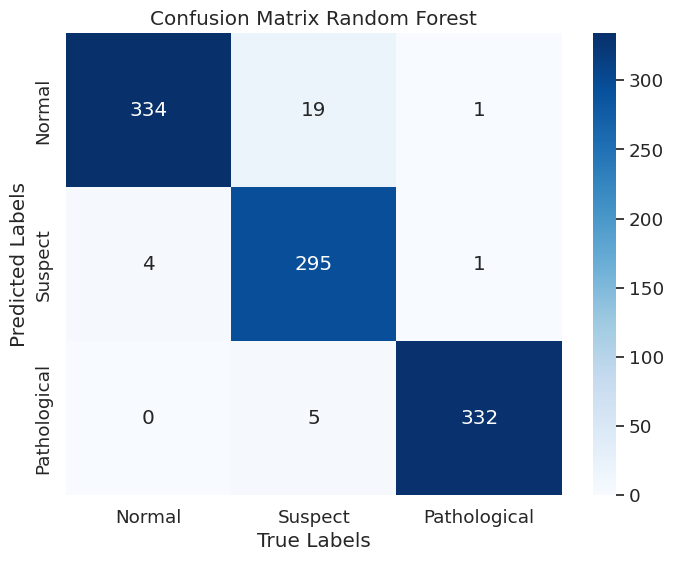

In [ ]:
# mencari parameter terbaik untuk model Random Forest menggunakan GridSearchCV
# melatih model dengan parameter terbaik yang ditemukan
# mengevaluasi menggunakan data testing

# Random forest

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [25, 50, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("Proses Grid Search dimulai...")
grid_search_rf.fit(X_train_selected, y_train_selected)

print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

rf_best_model = grid_search_rf.best_estimator_

rf_best_model.fit(X_train_selected, y_train_selected)

y_pred_rf = rf_best_model.predict(X_test_selected)

print("\n", "-" * 20, "Evaluasi Random Forest", "-" * 20)
print(classification_report(y_test_selected, y_pred_rf))

rf_acc_selected = accuracy_score(y_test_selected, y_pred_rf)
print(f"Akurasi Model Random Forest (Setelah Seleksi Fitur): {rf_acc_selected:.2%}")

cm = confusion_matrix(y_test_selected, y_pred_rf)
fetal_labels = ['Normal', 'Suspect', 'Pathological']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()



 -------------------- Evaluasi KNN --------------------
              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       354
         2.0       0.86      0.96      0.91       300
         3.0       0.97      0.98      0.98       337

    accuracy                           0.93       991
   macro avg       0.93      0.94      0.93       991
weighted avg       0.94      0.93      0.93       991



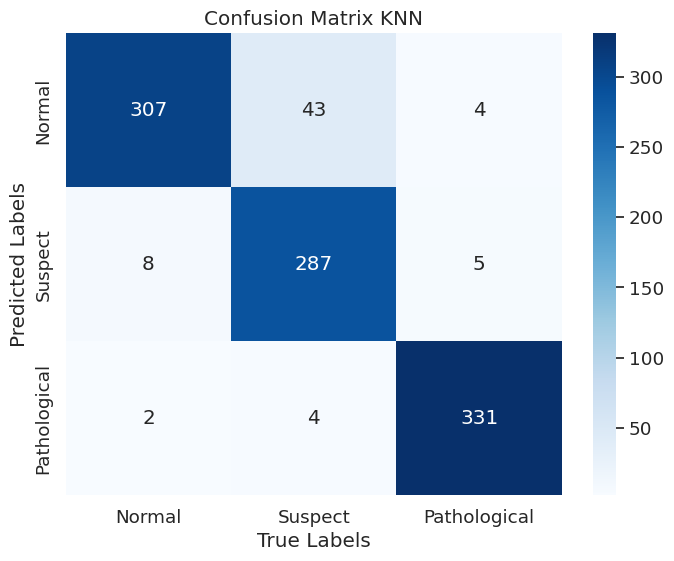

In [ ]:
# mencari parameter terbaik untuk model KNN menggunakan GridSearchCV
# melatih model dengan parameter terbaik yang ditemukan
# mengevaluasi menggunakan data testing

# KNN

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='uniform')

knn_model.fit(X_train_selected, y_train_selected)

# Evaluasi KNN

y_pred_knn = knn_model.predict(X_test_selected)

print("\n", "-" * 20, "Evaluasi KNN", "-" * 20)
print(classification_report(y_test_selected, y_pred_knn))

knn_acc_selected = accuracy_score(y_test_selected, y_pred_knn)

cm = confusion_matrix(y_test_selected, y_pred_knn)
fetal_labels = ['Normal', 'Suspect', 'Pathological']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fetal_labels, yticklabels=fetal_labels)
plt.title('Confusion Matrix KNN')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

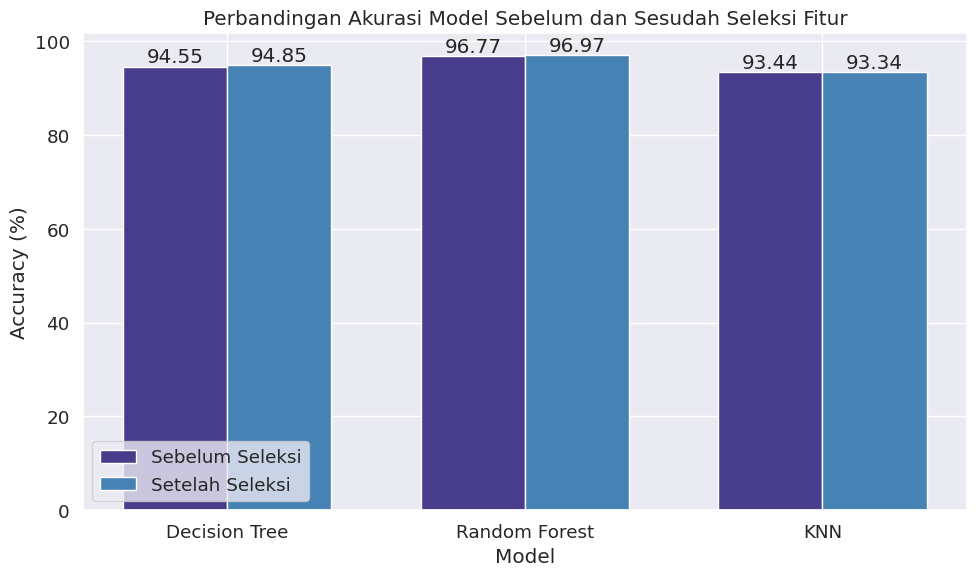

In [ ]:
# visualisasi perbandingan akurasi model sebelum dan setelah seleksi fitur menggunakan diagram batang
model_comp_selected = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy_Before': [dt_acc * 100, rf_acc * 100, knn_acc * 100],
    'Accuracy_After': [dt_acc_selected * 100, rf_acc_selected * 100, knn_acc_selected * 100]
})

x = np.arange(len(model_comp_selected['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x - width/2, model_comp_selected['Accuracy_Before'], width, label='Sebelum Seleksi', color='#483D8B')
bars2 = ax.bar(x + width/2, model_comp_selected['Accuracy_After'], width, label='Setelah Seleksi', color='#4682B4')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Perbandingan Akurasi Model Sebelum dan Sesudah Seleksi Fitur')
ax.set_xticks(x)
ax.set_xticklabels(model_comp_selected['Model'])
ax.legend(loc='lower left')

for bars in [bars, bars2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()